# Tutorial 7: Nearest Neighbors
### Dr. Daugherity, PHYS 453 - Spring 2020

TODO
* add example of using helper functions


**REFERENCES**
* 


In [2]:
# Load libraries  - NOTE that we're not using pandas or seaborn today!
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn import datasets

# Dataset
Just like seaborn has built-in datasets for pandas dataframes, we can use sklearn's dataset module to get data in our (X,y) format.  We'll stick with iris (so we're not changing too many things at once)

In [24]:
X,y = datasets.load_iris(return_X_y=True)

In [6]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [7]:
y[:5]

array([0, 0, 0, 0, 0])

This is identical to the iris dataframe we get from seaborn, expect this comes in the format we need with no extra steps.  
You see we get all 4 features:
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html
* sepal length in cm
* sepal width in cm
* petal length in cm
* petal width in cm

and all 3 species (in order: Setosa, Versicolor, Virginica)


Just for easy visualization, I'm going to drop two features just like before, but we will keep all 3 species for fun


In [29]:
X = X[:,[2,0]]  # only save columns 2 and 0

# Comparison of K
Now we have all the tools to compare different k-values

In [40]:
# Borrow a color palette from the sklearn example
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

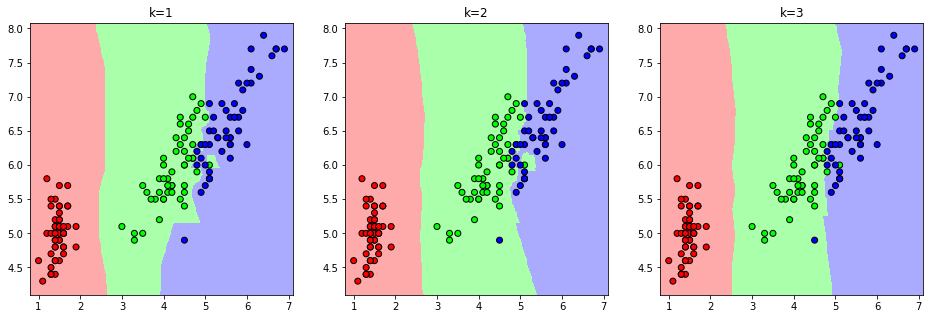

In [47]:
plt.figure(figsize=(16,5))
pltnum = 1

for k in [1,2,3]:
    plt.subplot(1,3,pltnum)
    pltnum+=1
    
    clf=neighbors.KNeighborsClassifier(n_neighbors=k)
    clf.fit(X,y)

    # Plot the decision boundary
    h = .02
    margin = 0.2
    x_min, x_max = X[:, 0].min()-margin, X[:, 0].max()+margin
    y_min, y_max = X[:, 1].min()-margin, X[:, 1].max()+margin
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:,0], X[:,1], c=y, edgecolor='k',cmap=cmap_bold) 
  
    #plt.legend()
    plt.title(f"k={k}")

#plt.savefig('knn-comp-HW3.png')
plt.show()

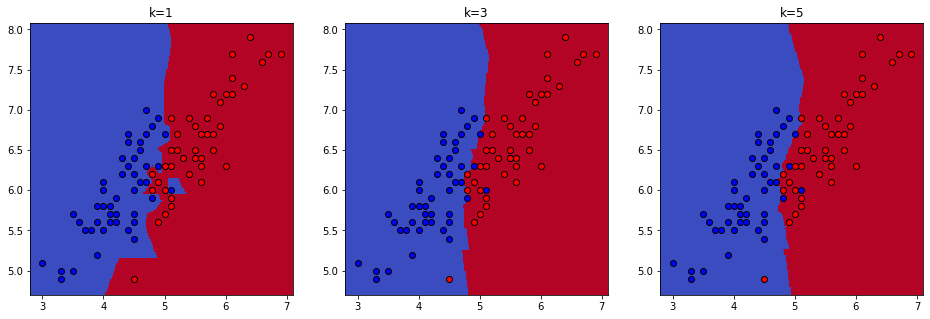

In [49]:
plt.figure(figsize=(16,5))
pltnum = 1

for k in [1,3,5]:
    plt.subplot(1,3,pltnum)
    pltnum+=1
    
    clf=neighbors.KNeighborsClassifier(n_neighbors=k)
    clf.fit(X,y)

    # Plot the decision boundary
    h = 0.02
    margin = 0.2
    x_min, x_max = X[:, 0].min()-margin, X[:, 0].max()+margin
    y_min, y_max = X[:, 1].min()-margin, X[:, 1].max()+margin
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap='coolwarm')

    plt.plot(X[y==0,0], X[y==0,1], 'bo', mec='k',label='Species 0') # mec = markeredgecolor
    plt.plot(X[y==1,0], X[y==1,1], 'ro', mec='k',label='Species 1') 
    #plt.legend()
    plt.title(f"k={k}")

plt.savefig('knn-comp-HW3.png')
plt.show()